# Context-Free Grammars and Parsing with NLTK
Partially taken from the NLTK book


## Initializations:


In [ ]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt-get update
!apt install ghostscript python3-tk
#from ctypes.util import find_library
#find_library("gs")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 75 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cra

## Loading a CFG grammar:

In [ ]:
import nltk

from nltk import CFG
from IPython.display import display

grammar = CFG.fromstring("""
   S -> NP VP
   PP -> P NP
   NP -> Det N | NP PP
   VP -> V NP | VP PP
   Det -> 'a' | 'the'
   N -> 'dog' | 'cat'
   V -> 'chased' | 'sat'
   P -> 'on' | 'in'
 """)

## Analyzing sentences:

In [ ]:
sent1 = "the dog chased the cat".split()
sent2 = "the dog chased the cat on the dog".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sent1): print(p)

(S (NP (Det the) (N dog)) (VP (V chased) (NP (Det the) (N cat))))


### Viewing the syntax tree:

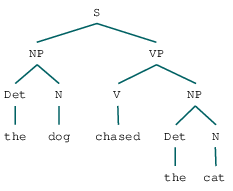

In [ ]:
# A single parse tree
display(p)

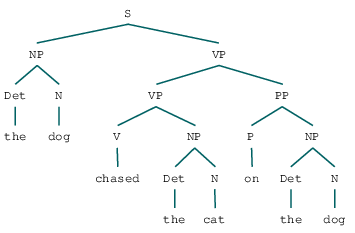

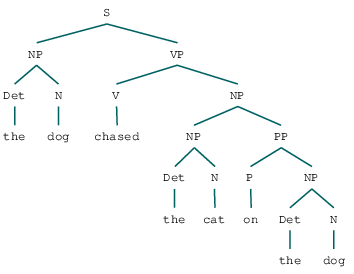

In [ ]:
# When there are several analyses
for p in chart_parser.parse(sent2): display(p)

## Generating sentences given a CFG:


In [ ]:
from nltk.parse.generate import generate, demo_grammar
from nltk import CFG
grammar = CFG.fromstring(demo_grammar)
print(grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'


In [ ]:
for sentence in generate(grammar, n=50, depth=5):
     print(' '.join(sentence))

the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man
the man saw a park
the man saw a dog
the park slept
the park saw the man
the park saw the park
the park saw the dog
the park saw a man
the park saw a park
the park saw a dog
the dog slept
the dog saw the man
the dog saw the park
the dog saw the dog
the dog saw a man
the dog saw a park
the dog saw a dog
a man slept
a man saw the man
a man saw the park
a man saw the dog
a man saw a man
a man saw a park
a man saw a dog
a park slept
a park saw the man
a park saw the park
a park saw the dog
a park saw a man
a park saw a park
a park saw a dog
a dog slept
a dog saw the man
a dog saw the park
a dog saw the dog
a dog saw a man
a dog saw a park
a dog saw a dog


## Example: issues in grammar design: avoid unnecessary ambiguity


(ADJP
  (ADJP (ADJP (ADJP white) (ADJP expensive)) (ADJP tall))
  (ADJP small))


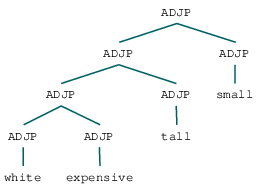

(ADJP
  (ADJP (ADJP white) (ADJP (ADJP expensive) (ADJP tall)))
  (ADJP small))


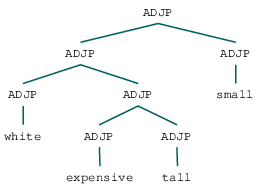

(ADJP
  (ADJP white)
  (ADJP (ADJP (ADJP expensive) (ADJP tall)) (ADJP small)))


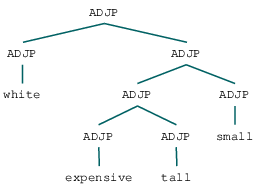

(ADJP
  (ADJP white)
  (ADJP (ADJP expensive) (ADJP (ADJP tall) (ADJP small))))


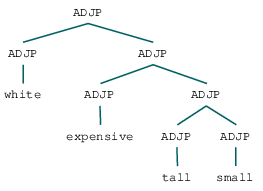

(ADJP
  (ADJP (ADJP white) (ADJP expensive))
  (ADJP (ADJP tall) (ADJP small)))


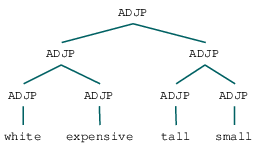

In [ ]:
import nltk
from nltk import CFG

grammar = CFG.fromstring("""
   ADJP -> ADJP ADJP
   ADJP -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise: rewrite the grammar so that there is only a single analysis for adjective chains

(ADJP
  (ADJ white)
  (ADJP (ADJ expensive) (ADJP (ADJ tall) (ADJP (ADJ small)))))


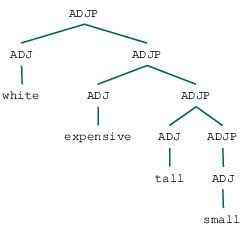

In [ ]:
grammar2 = CFG.fromstring("""
   # Design your new ADJP grammar based on this one:
   ADJP -> ADJ ADJP
   ADJP -> ADJ
   ADJ -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar2)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise (homework assignment)

Take the following grammar:

In [ ]:
from nltk import CFG

grammar = CFG.fromstring("""
 S -> NP VP | ADVP NP VP
 PP -> P NP
 NP -> Det N | NP PP
 NP -> Det ADJ N
 VP -> V NP | VP PP
 ADVP -> ADV
 ADV -> 'today'
 Det -> 'a' | 'the'
 N -> 'dog' | 'cat'
 V -> 'chased' | 'sat'
 P -> 'on' | 'in'
 ADJ -> A | ADJ A
 A -> 'big' | 'white'
 S1 -> NP VP | NP V
 S -> S CORD S1
 CORD -> 'and'
 """)

Write rules:
* Simple sentences:
  * the big white cat sat on the dog
  * today the big white cat sat on the dog
  * Sally ate a sandwich .
  * Sally and the president wanted and ate a sandwich .
  * the president sighed .
  * the president thought that a sandwich sighed .
  * it perplexed the president that a sandwich ate Sally .
  * the very very very perplexed president ate a sandwich .
  * the president worked on every proposal on the desk .
* Relative clauses:
  * the cat that the dog chased chased the dog
* Coordination:
  * The cat and the dog chased the cat
* **Always save the last correct grammar (and example sentences)!** <br> Any change can have positive or negative effects, and there must always be a way to go back to the last correct version
* Document the resulting grammar: range of syntactic constructions covered, example analyses, limitations, ...
* Provide 5 random sentences generated with your last version of the grammar  illustrating your modifications.

Something to start with:


SIMPLE SENTENCES

the big white cat sat on the dog
(S
  (NP (Det the) (ADJ (ADJ (A big)) (A white)) (N cat))
  (VP (V sat) (PP (P on) (NP (Det the) (N dog)))))


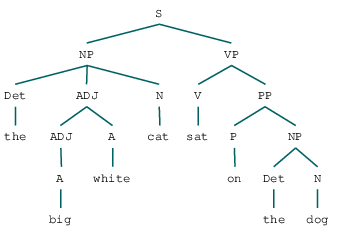

today the big white cat sat on the dog
(S
  (ADVP (ADV today))
  (NP (Det the) (ADJ (ADJ (A big)) (A white)) (N cat))
  (VP (V sat) (PP (P on) (NP (Det the) (N dog)))))


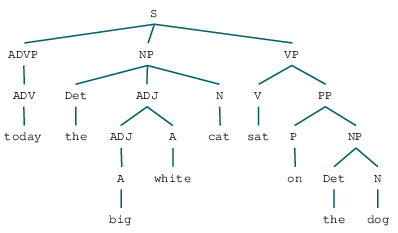

Sally ate a sandwich
(S (NP (N Sally)) (VP (V ate) (NP (Det a) (N sandwich))))


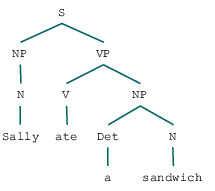

Sally and the president wanted and ate a sandwich
(S
  (NP (NP (N Sally)) (CORD and) (NP (Det the) (N president)))
  (VP (V wanted) (CORD and) (V ate) (NP (Det a) (N sandwich))))


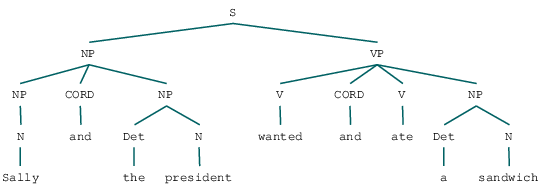

the president sighed
(S (NP (Det the) (N president)) (VP (V sighed)))


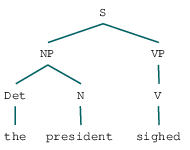

the president thought that a sandwich sighed
(S
  (NP (Det the) (N president))
  (VP
    (V thought)
    (NOUN_CLAUSE
      (SUBORD that)
      (S (NP (Det a) (N sandwich)) (VP (V sighed))))))


ValueError: ignored

Tree('S', [Tree('NP', [Tree('Det', ['the']), Tree('N', ['president'])]), Tree('VP', [Tree('V', ['thought']), Tree('NOUN_CLAUSE', [Tree('SUBORD', ['that']), Tree('S', [Tree('NP', [Tree('Det', ['a']), Tree('N', ['sandwich'])]), Tree('VP', [Tree('V', ['sighed'])])])])])])

it perplexed the president that a sandwich ate Sally
(S
  (PRN it)
  (VP (V perplexed) (NP (Det the) (N president)))
  (NOUN_CLAUSE
    (SUBORD that)
    (S (NP (Det a) (N sandwich)) (VP (V ate) (NP (N Sally))))))


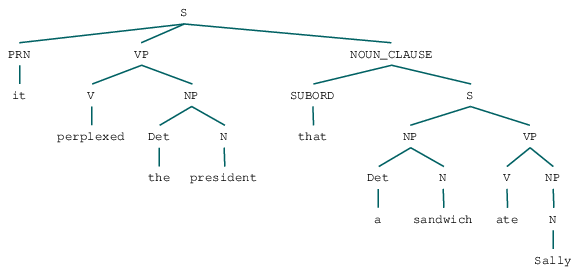

the very very very perplexed president ate a sandwich
(S
  (NP
    (Det the)
    (ADJ (ADJ (ADJ (ADJ (A very)) (A very)) (A very)) (A perplexed))
    (N president))
  (VP (V ate) (NP (Det a) (N sandwich))))


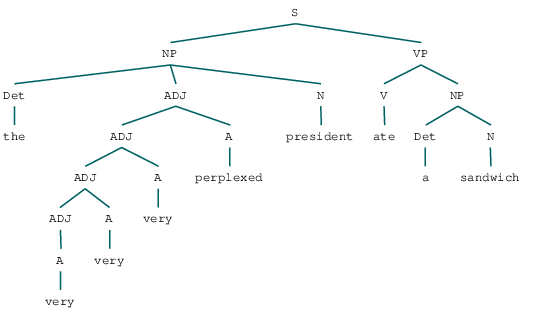

the president worked on every proposal on the desk
(S
  (NP (Det the) (N president))
  (VP
    (V worked)
    (PP
      (P on)
      (NP
        (NP (Det every) (N proposal))
        (PP (P on) (NP (Det the) (N desk)))))))


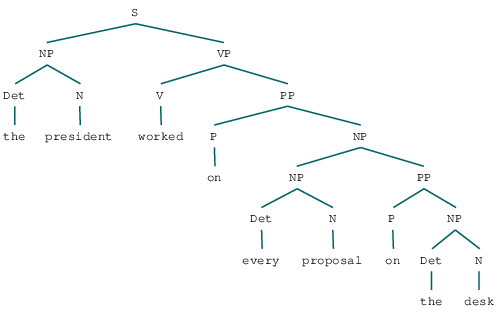


RELATIVE CLAUSES

the cat that the dog chased chased the dog
(S
  (NP
    (NP (Det the) (N cat))
    (REL_CLAUSE
      (SUBORD that)
      (S (NP (Det the) (N dog)) (VP (V chased)))))
  (VP (V chased) (NP (Det the) (N dog))))


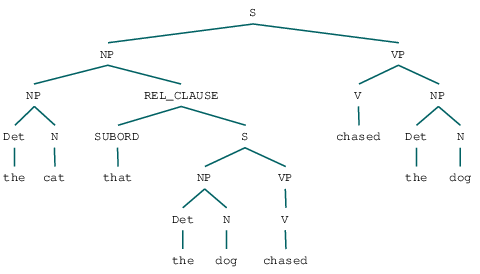


SENTENCES WITH COORDINATION

the cat and the dog chased the cat
(S
  (NP (NP (Det the) (N cat)) (CORD and) (NP (Det the) (N dog)))
  (VP (V chased) (NP (Det the) (N cat))))


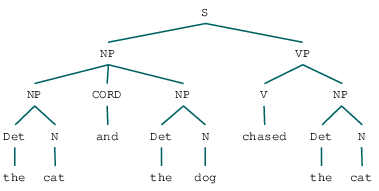

In [ ]:
#We redefine our Grammar here!
grammar = CFG.fromstring("""
 S -> NP VP | ADVP NP VP | PRN VP NOUN_CLAUSE
 PP -> P NP
 NP -> Det N | NP PP | ADJ N | Det ADJ N | N | NP CORD NP | NP REL_CLAUSE
 VP -> V NP | V PP | V | V CORD V NP | V NP NOUN_CLAUSE | V NOUN_CLAUSE
 ADVP -> ADV
 ADV -> 'today'
 Det -> 'a' | 'the' | 'every'
 N -> 'dog' | 'cat' | 'Sally' | 'sandwich' | 'president' | 'proposal' | 'desk'
 PRN -> 'it'
 V -> 'chased' | 'sat' | 'ate' | 'wanted' | 'sighed' | 'thought' | 'perplexed' | 'worked'
 P -> 'on' | 'in'
 ADJ -> ADJ A | A
 A -> 'big' | 'white' | 'very' | 'perplexed'
 S1 -> NP VP | NP V
 S -> S CORD S1
 CORD -> 'and'
 SUBORD -> 'that'
 REL_CLAUSE -> SUBORD S
 NOUN_CLAUSE -> SUBORD S
 """)

# "the president thought that a sandwich sighed"
# "the president worked on every proposal on the desk"

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

def checkSentenceInGrammar(sentence, chart_parser):

  # View the analysis
  for p in chart_parser.parse(sentence.split()): 
    print(p)
    display(p)

  return

simple_sentences = [
  "the big white cat sat on the dog",
  "today the big white cat sat on the dog",
  "Sally ate a sandwich",
  "Sally and the president wanted and ate a sandwich",
  "the president sighed",
  "the president thought that a sandwich sighed",
  "it perplexed the president that a sandwich ate Sally",
  "the very very very perplexed president ate a sandwich",
  "the president worked on every proposal on the desk"
]

print("\nSIMPLE SENTENCES\n")
for sentence in simple_sentences:
  print(sentence)
  checkSentenceInGrammar(sentence, chart_parser)

relative_clauses = \
[
 "the cat that the dog chased chased the dog"
]

print("\nRELATIVE CLAUSES\n")
for sentence in relative_clauses:
  print(sentence)
  checkSentenceInGrammar(sentence, chart_parser)

coordination_sentences = \
[
 "the cat and the dog chased the cat"
]

print("\nSENTENCES WITH COORDINATION\n")
for sentence in coordination_sentences:
  print(sentence)
  checkSentenceInGrammar(sentence, chart_parser)